In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import env
import acquire_zillow
import prepare


# Data Acquisition & Preperation

In [2]:
# acquiring and preparing data 
df = prepare.wrangle_zillow()
df.head()


,bedrooms,bathrooms,squarefeet,total_taxes,yearbuilt,county
0,4.0,4.0,2954.0,735227.0,1924.0,Los_Angeles
1,4.0,2.0,1390.0,429900.0,1962.0,Orange
2,2.0,1.0,823.0,148542.0,1986.0,Los_Angeles
3,4.0,3.0,2966.0,654241.0,2001.0,Los_Angeles
4,2.0,2.0,1540.0,456340.0,1938.0,Los_Angeles


In [3]:
train, validate, test = prepare.split_data(df)

In [4]:
train.head()

,bedrooms,bathrooms,squarefeet,total_taxes,yearbuilt,county
15738,3.0,2.0,1855.0,67857.0,1954.0,Orange
32066,3.0,1.0,1082.0,295125.0,1953.0,Los_Angeles
23254,4.0,3.0,3294.0,717274.0,2000.0,Orange
22616,3.0,1.5,1426.0,318217.0,1968.0,Orange
50357,4.0,3.0,2612.0,396546.0,1966.0,Los_Angeles


In [5]:
train.bathrooms.min()

0.0

In [6]:
#getting to know the data even more/ datatypes, number/names of columns sample size etc
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27087 entries, 15738 to 24027
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     27087 non-null  float64
 1   bathrooms    27087 non-null  float64
 2   squarefeet   27087 non-null  float64
 3   total_taxes  27087 non-null  float64
 4   yearbuilt    27087 non-null  float64
 5   county       27087 non-null  object 
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [7]:
#this shows a general outlook of the statistical nature of the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,27087.0,3.240669,0.879133,0.0,3.0,3.0,4.0,6.0
bathrooms,27087.0,2.169491,0.831296,0.0,2.0,2.0,3.0,6.0
squarefeet,27087.0,1777.785100,735.452292,152.0,1246.0,1601.0,2159.0,5960.0
total_taxes,27087.0,392588.607635,264492.684934,1000.0,180566.0,348230.0,546121.0,1200000.0
yearbuilt,27087.0,1962.592498,22.424883,1885.0,1950.0,1960.0,1977.0,2016.0


#### You called out at least four of the questions you asked of the data and provided a clear answer using natural language in markdown cells in your final report


1. does the number of bedrooms and bathrooms in a house increase the cost of the home?
2. is the price of the house influenced by the county/ location?
3. does the age of the house matter when it comes to the price? 
4. does the size of the house in sqfeet influence the price?


### 1. does the number of bedrooms and bathrooms in a house increase the cost of the home


No handles with labels found to put in legend.


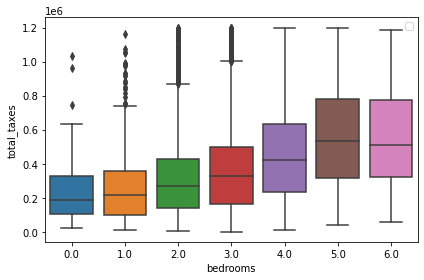

No handles with labels found to put in legend.


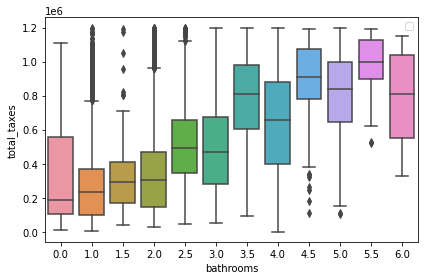

In [8]:
target = train.total_taxes
train_drop = train.drop(columns=["total_taxes","squarefeet","yearbuilt","county"])

# I use a for loop to boxplot my independent variables against our dependent one:
for col in train_drop:
    sns.boxplot(x=train_drop[col], y=target, data=train_drop)
    plt.ylabel('total_taxes')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

## takeaways
#### it appears that the numberof bedrooms have a positive relationship with the cost of the house
#### additionally according to the charts the higher the number of bathrooms the higher the price

No handles with labels found to put in legend.


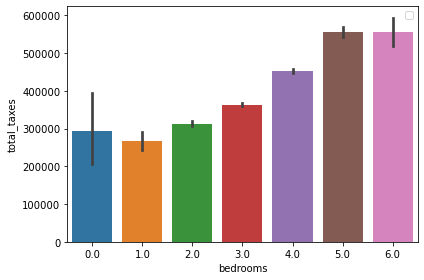

No handles with labels found to put in legend.


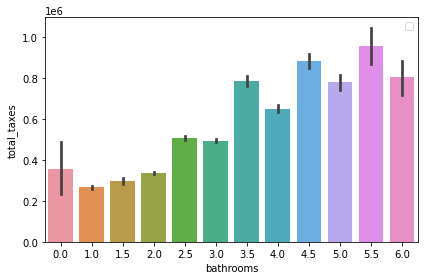

No handles with labels found to put in legend.


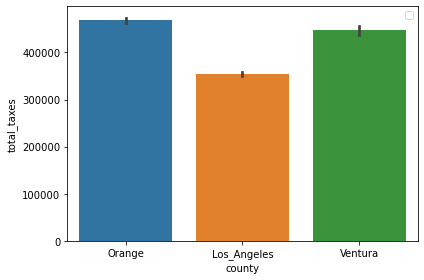

In [9]:
#here I distinguish different categories and plot them to vizualize different relationships or potential ones 
target = train.total_taxes
train_drop = train.drop(columns=["total_taxes","squarefeet","yearbuilt"])

# I use a for loop to barplots my independent variables against our dependent one:
for col in train_drop:
    sns.barplot(x=train_drop[col], y=target, data=train_drop)
    plt.ylabel('total_taxes')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

No handles with labels found to put in legend.


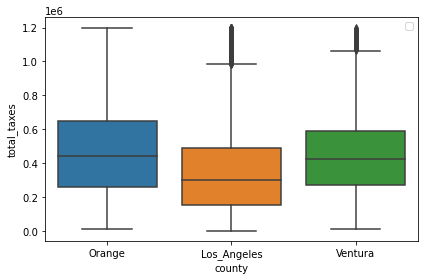

No handles with labels found to put in legend.


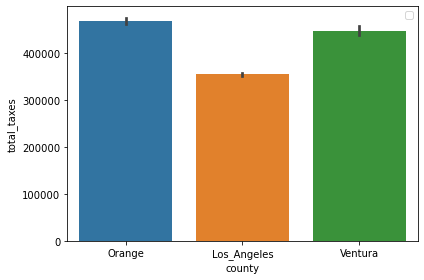

In [10]:
target = train.total_taxes
train_drop = train.drop(columns=["total_taxes","squarefeet","yearbuilt","bedrooms","bathrooms"])

# I use a for loop to boxplot my independent variables against our dependent one:
for col in train_drop:
    sns.boxplot(x=train_drop[col], y=target, data=train_drop)
    plt.ylabel('total_taxes')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()
    

# I use a for loop to boxplot my independent variables against our dependent one:
for col in train_drop:
    sns.barplot(x=train_drop[col], y=target, data=train_drop)
    plt.ylabel('total_taxes')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

## takeaways
#### it appears that houses are less expensive in LA and than in Ventura and Orange county respectively


### 3. does the age of the house matter when it comes to the price? 


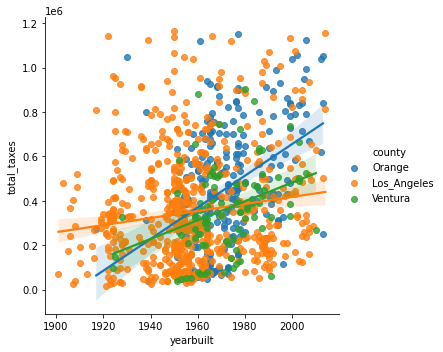

In [11]:
#this codetakes in a sample of the data and creates a scatter plot with hue that showes where houses
#in the sample are located and draws a regression line
sns.lmplot(x="yearbuilt", y="total_taxes", hue ="county", data=train.sample(1000))


#### it appears that the houses in ventura and in orange county appear to be more expenive the newer they are, unlike in Los angeles

### 4. does the size of the house in sqfeet influence the price?


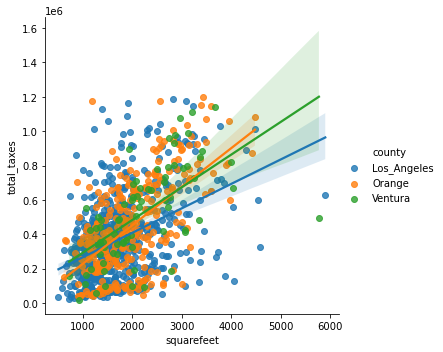

In [12]:
#here is a comparisson between squarefeet and total_taxes with the colors indicating what county the houses are in(picked a sample of 1000) 

sns.lmplot(x="squarefeet", y="total_taxes", hue ="county", data=train.sample(1000))


### takeaways

#### it appears that the size of the house has a high positive relationship with the price. this is also evident with the positive relationship between the number of bedrooms and total_taxes


### Summary

## Statistical tests

In [13]:
a = 0.05

#### $ H0 $ : the number of bathrooms have no relationship to the property prices

#### $ H1 $ : the higher the number of bathrooms, the higher the price of the house 

In [14]:
x = train.bathrooms
y = train.total_taxes

corr, p = stats.pearsonr(x, y)
print(f'corr = {corr:.5f}')
print(f'p = {p:.5f}')

if p<a:
    print(f"I reject the null hypothesis")
else:
    print(f"I reject the null hypothesis")


corr = 0.43426
p = 0.00000
I reject the null hypothesis


#### $ H0 $ : the number of bedrooms have no relationship to the property prices
#### $ H1 $ : the higher the number of bedrooms, the higher the price of the house 

In [15]:
# this code takes in the number of bedrooms and the total taxes 
#returns correlation and p values to determine the statistical significance
x1 = train.bedrooms
y1 = train.total_taxes

corr1, p1 = stats.pearsonr(x1, y1)
print(f'corr = {corr1:.5f}')
print(f'p = {p1:.5f}')

if p<a:
    print(f"I reject the null hypothesis")
else:
    print(f"I reject the null hypothesis")


corr = 0.24929
p = 0.00000
I reject the null hypothesis


#### $H0$: the age of the house has no relationship to the property prices

#### $H1$:the newer the property the more expensive it is 

In [16]:
# this code takes in the year the property was built and the total taxes 
#returns r and p values to determine the statistical significance
x3= train["yearbuilt"]
y3 = train["total_taxes"]
r, p2 = stats.pearsonr(x3, y3)
print(f'r = {r:.5f}')
print(f'p = {p2:.5f}')
# however it is a weak correlation 
if p<a:
    print(f"I reject the null hypothesis")
else:
    print(f"I reject the null hypothesis")

r = 0.26518
p = 0.00000
I reject the null hypothesis


#### $H0$: the size of the house in squarefeet does not have a relationship with the price

#### $H1$: the size of the house in squarefeet has a relatively strong correlation with the property prices

In [17]:
# this code takes in the squarefeet and the total taxes 
#returns r and p values to determine the statistical significance

x4= train["squarefeet"]
y4 = train["total_taxes"]
r1, p3 = stats.pearsonr(x4, y4)
print(f'r = {r1:.5f}')
print(f'p = {p3:.5f}')

if p<a:
    print(f"I reject the null hypothesis")
else:
    print(f"I reject the null hypothesis")

r = 0.50148
p = 0.00000
I reject the null hypothesis


In [18]:
cor = train.corr()
cor

,bedrooms,bathrooms,squarefeet,total_taxes,yearbuilt
bedrooms,1.000000,0.619454,0.631366,0.249288,0.389015
bathrooms,0.619454,1.000000,0.808249,0.434259,0.557527
squarefeet,0.631366,0.808249,1.000000,0.501476,0.489558
total_taxes,0.249288,0.434259,0.501476,1.000000,0.265175
yearbuilt,0.389015,0.557527,0.489558,0.265175,1.000000


<AxesSubplot:>

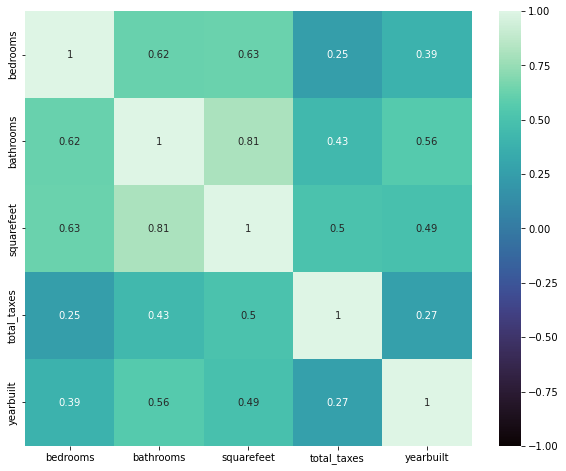

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot = True,cmap = 'mako',center = 0,vmin = -1, vmax = 1)

## scaling

In [38]:
# creating variables for data/columns to be scaled 
columns_train = train[["bedrooms","bathrooms","squarefeet","total_taxes"]]
columns_validate = validate[["bedrooms","bathrooms","squarefeet","total_taxes"]]
X_train, X_validate= columns_train, columns_validate
y_train, y_validate = columns_train, columns_validate
y_train.shape

(27087, 4)

In [41]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.fit_transform(X_validate)
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_validate_scaled_df = pd.DataFrame(X_validate_scaled)
X_validate_scaled_df.columns=(["bedrooms","bathrooms","squarefeet","total_taxes"])
X_train_scaled_df.columns=(["bedrooms","bathrooms","squarefeet","total_taxes"])

y_train_scaled = scaler.fit_transform(y_train)
y_train_scaled_df = pd.DataFrame(y_train_scaled)
y_validate_scaled = scaler.fit_transform(y_validate)
y_validate_scaled_df = pd.DataFrame(y_validate_scaled)
y_validate_scaled_df.columns=(["bedrooms","bathrooms","squarefeet","total_taxes"])
y_train_scaled_df.columns=(["bedrooms","bathrooms","squarefeet","total_taxes"])

X_train_scaled_df.shape, y_validate_scaled_df.shape

((27087, 4), (11610, 4))

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'squarefeet'}>,
        <AxesSubplot:title={'center':'total_taxes'}>]], dtype=object)

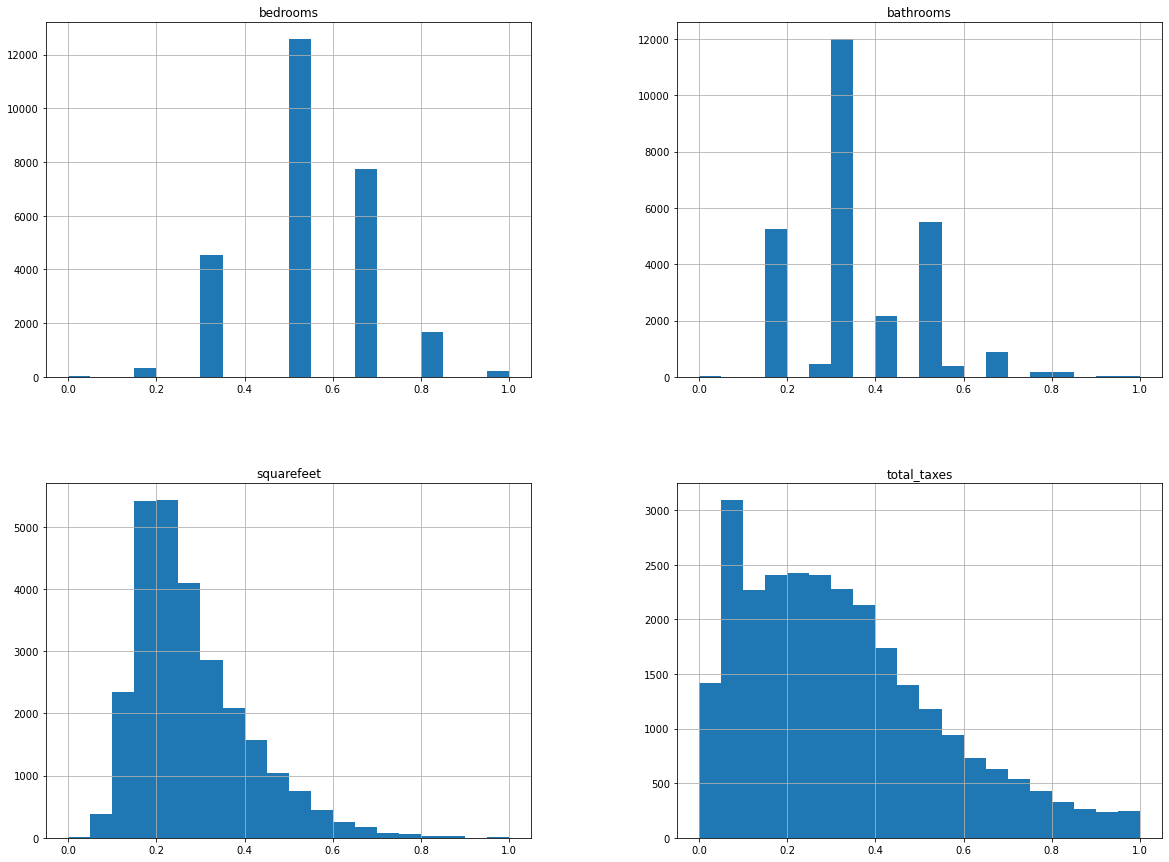

In [22]:
X_train_scaled_df.hist(bins = 20,figsize =  (20,15))

## BASELINE


In [26]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
# y_train = pd.DataFrame(y_train)
# y_validate = pd.DataFrame(y_validate)

# 1. predict total_tax_pred_median
T_pred_mean = y_train['total_taxes'].mean()
y_train['T_pred_mean'] = T_pred_mean
y_validate['T_pred_mean'] =T_pred_mean

# 2. compute total_tax_pred_median
T_pred_median = y_train['total_taxes'].median()
y_train['T_pred_median'] = T_pred_median
y_validate['T_pred_median'] =T_pred_median

# 3. RMSE of Total_taxes pred_mean
rmse_train = mean_squared_error(y_train.total_taxes, y_train.T_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.total_taxes, y_validate.T_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of total_taxes pred_median
rmse_train_med = mean_squared_error(y_train.total_taxes, y_train.T_pred_median)**(1/2)
rmse_validate_med = mean_squared_error(y_validate.total_taxes, y_validate.T_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train_med, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_med, 2))

RMSE using Mean
Train/In-Sample:  264487.8 
Validate/Out-of-Sample:  264650.06
RMSE using Median
Train/In-Sample:  268181.81 
Validate/Out-of-Sample:  268086.55


In [32]:
y_validate.shape,y_train.shape

((11610, 5), (27087, 5))

## MODELING

In [47]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled_df, y_train_scaled_df.total_taxes)

# predict train
y_train['total_taxes_pred'] = lm.predict(X_train_scaled_df)

# evaluate: rmse
rmse_train = mean_squared_error(y_train_scaled_df.total_taxes, y_train_scaled_df.total_taxes_pred)**(1/2)

# predict validate
y_validate['total_taxes_pred'] = lm.predict(X_validate_scaled_df)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate_scaled_df.total_taxes, y_validate_scaled_df.total_taxes_pred)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  1.6777778414128565e-16 
Validation/Out-of-Sample:  1.7252646913042387e-16
